In [2]:
pip install pytrends


Note: you may need to restart the kernel to use updated packages.


In [3]:
from pytrends.request import TrendReq

# Initialize pytrends request
pytrends = TrendReq(hl='en-US', tz=360)

# List of pizza restaurants from your image
keywords = [
    "Papa Murphy's",
    "California Pizza Kitchen",
    "Papa John's Pizza",
    "Gino's Pizzeria",
    "Pirates Pizza",
    "Domino's Pizza",
    "Olympia Pizza and Spaghetti House",
    "Round Table Pizza",
    "Pizza Hut",
    "Brick Oven"
]

# You will have to run these in batches because Google Trends API only allows comparison of a few items at a time
# This example shows how to retrieve data for the first five restaurants

# Build the payload for the first batch
pytrends.build_payload(kw_list=keywords[:5], timeframe='today 12-m', geo='US')

# Get interest over time for the first batch
interest_over_time_df_batch1 = pytrends.interest_over_time()

# ... Repeat the process for the remaining restaurants

print(interest_over_time_df_batch1)


            Papa Murphy's  California Pizza Kitchen  Papa John's Pizza  \
date                                                                     
2023-04-02             18                        30                 63   
2023-04-09             16                        23                 57   
2023-04-16             17                        28                 58   
2023-04-23             17                        29                 57   
2023-04-30             18                        23                 56   
2023-05-07             19                        24                 61   
2023-05-14             18                        29                 60   
2023-05-21             17                        24                 62   
2023-05-28             18                        30                 70   
2023-06-04             18                        28                 63   
2023-06-11             19                        28                 60   
2023-06-18             17             

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'combined_df' is your final combined and normalized DataFrame

plt.figure(figsize=(15, 7))

# Plot each column (each restaurant)
for column in combined_df.columns:
    plt.plot(combined_df.index, combined_df[column], label=column)

# Make the chart readable
plt.title('Google Search Interest Over Time')
plt.xlabel('Date')
plt.ylabel('Relative Search Interest')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust the padding between and around subplots.

# Show the plot
plt.show()


NameError: name 'combined_df' is not defined

<Figure size 1500x700 with 0 Axes>

In [12]:
from pytrends.request import TrendReq

# Initialize pytrends request
pytrends = TrendReq(hl='en-US', tz=360)

# List of pizza restaurants from your image split into two batches (for example purposes)
keywords_batch1 = ["Papa Murphy's", "California Pizza Kitchen", "Papa John's Pizza"]
keywords_batch2 = ["Gino's Pizzeria", "Pirates Pizza"]
keywords_batch3 = ["Domino's Pizza",
    "Olympia Pizza and Spaghetti House",
    "Round Table Pizza",
    "Pizza Hut",
    "Brick Oven"]

# Function to retrieve and normalize trends data
def get_trends(keywords):
    pytrends.build_payload(keywords, timeframe='today 12-m', geo='US')
    df = pytrends.interest_over_time().drop(columns='isPartial')  # Ignore the 'isPartial' column
    # Normalize data
    df = df / df.max() * 100
    return df

# Retrieve data for each batch
df_batch1 = get_trends(keywords_batch1)
df_batch2 = get_trends(keywords_batch2)



TooManyRequestsError: The request failed: Google returned a response with code 429

In [13]:
df_batch3 = get_trends(keywords_batch3)

In [14]:
# Combine the two dataframes
combined_df = pd.concat([df_batch1, df_batch2,df_batch3], axis=1)


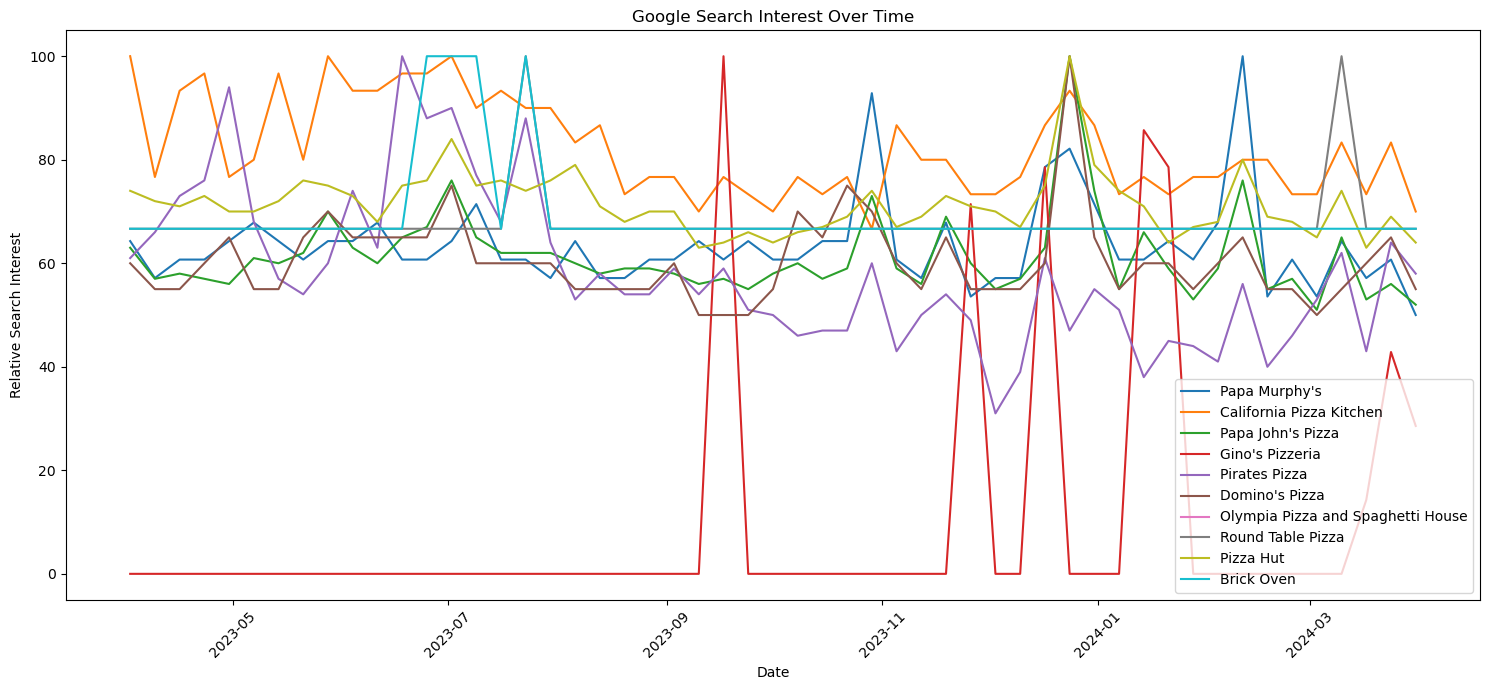

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))

# Plot each column (each restaurant)
for column in combined_df.columns:
    plt.plot(combined_df.index, combined_df[column], label=column)

# Make the chart readable
plt.title('Google Search Interest Over Time')
plt.xlabel('Date')
plt.ylabel('Relative Search Interest')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust the padding between and around subplots.

# Show the plot
plt.show()


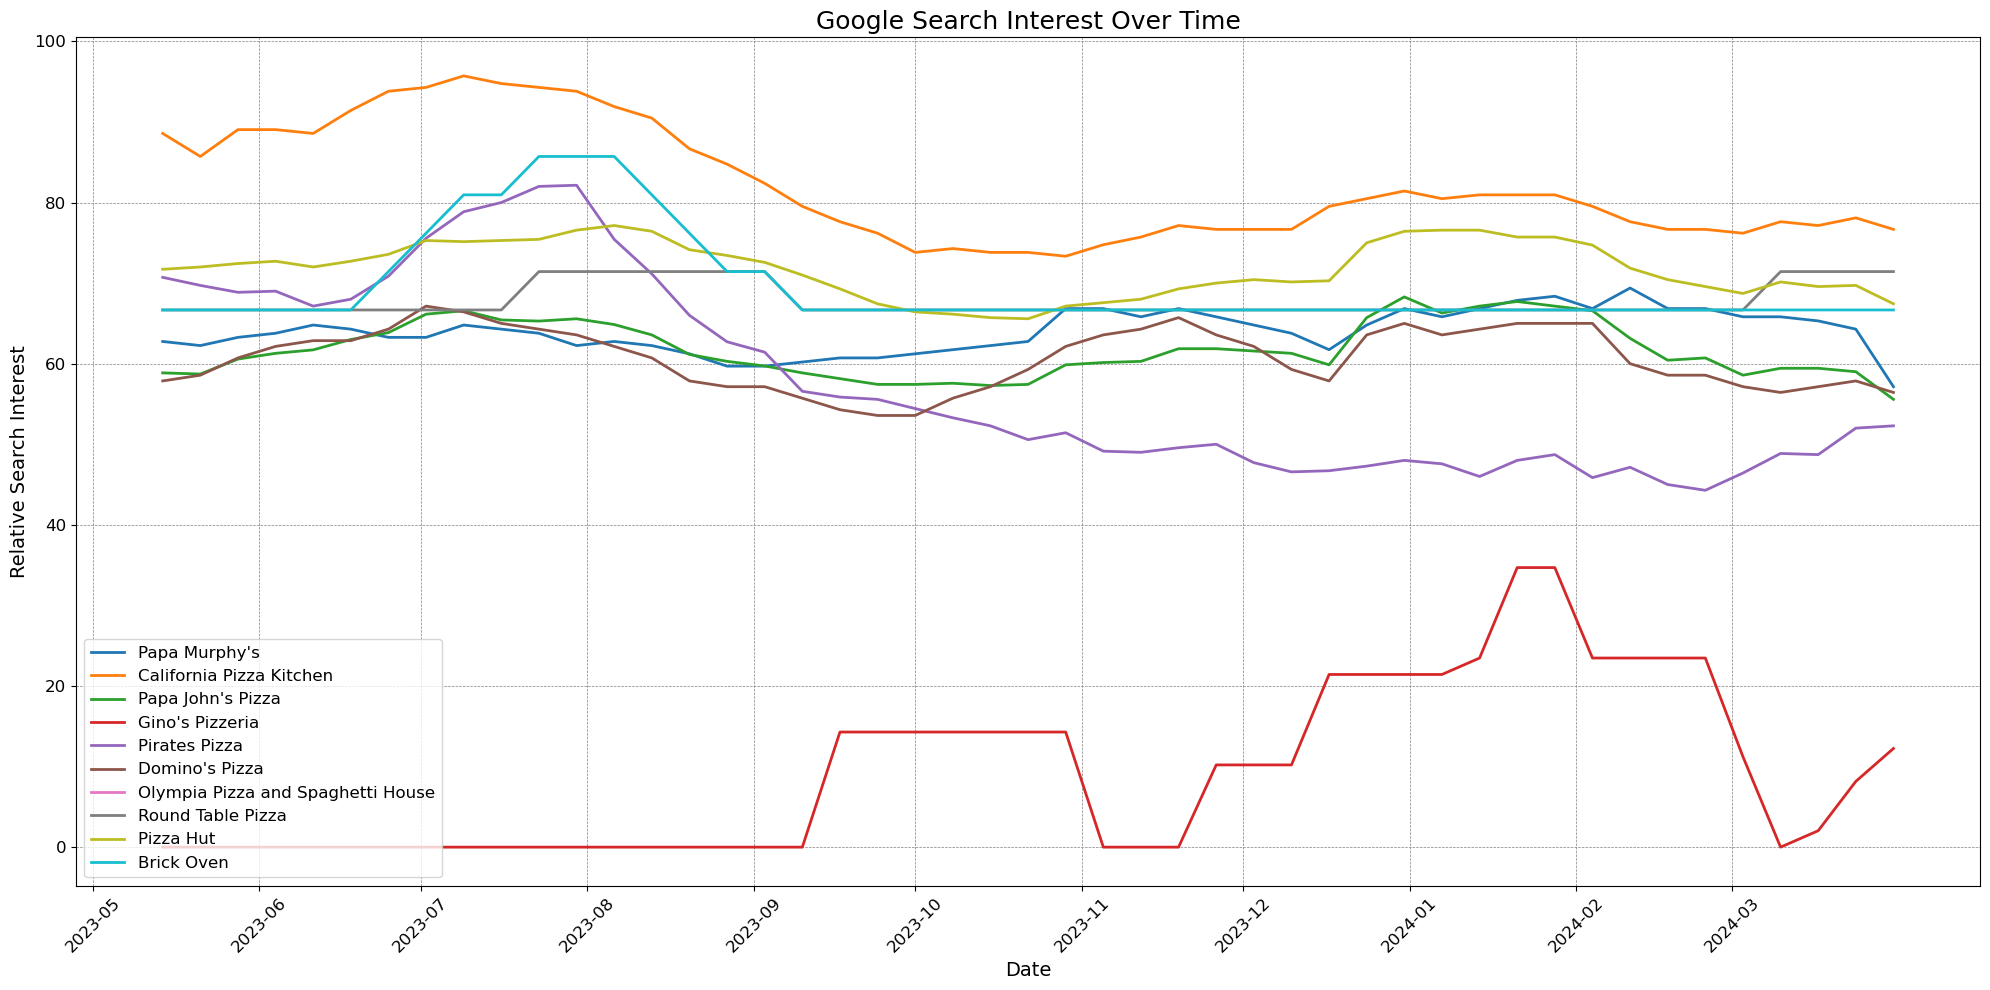

In [16]:
plt.figure(figsize=(20, 10))  # Increased figure size

# Plot each column (each restaurant) with a smoother line using rolling mean if needed
for column in combined_df.columns:
    # Apply a rolling window (7 days for weekly smoothing)
    rolling_mean = combined_df[column].rolling(window=7).mean()
    plt.plot(combined_df.index, rolling_mean, label=column, linewidth=2)

# Make the chart readable
plt.title('Google Search Interest Over Time', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Relative Search Interest', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')  # Add a grid for better readability
plt.tight_layout()  # Adjust the padding between and around subplots.

# To avoid congestion on the x-axis, you can set custom ticks at larger intervals
# For example, you could show ticks at the first of each month
# Assuming combined_df.index is a DatetimeIndex
if isinstance(combined_df.index, pd.DatetimeIndex):
    tick_labels = pd.date_range(start=combined_df.index.min(), end=combined_df.index.max(), freq='MS')
    plt.xticks(ticks=tick_labels, labels=tick_labels.strftime('%Y-%m'))  # Format like '2020-01'

# Show the plot
plt.show()


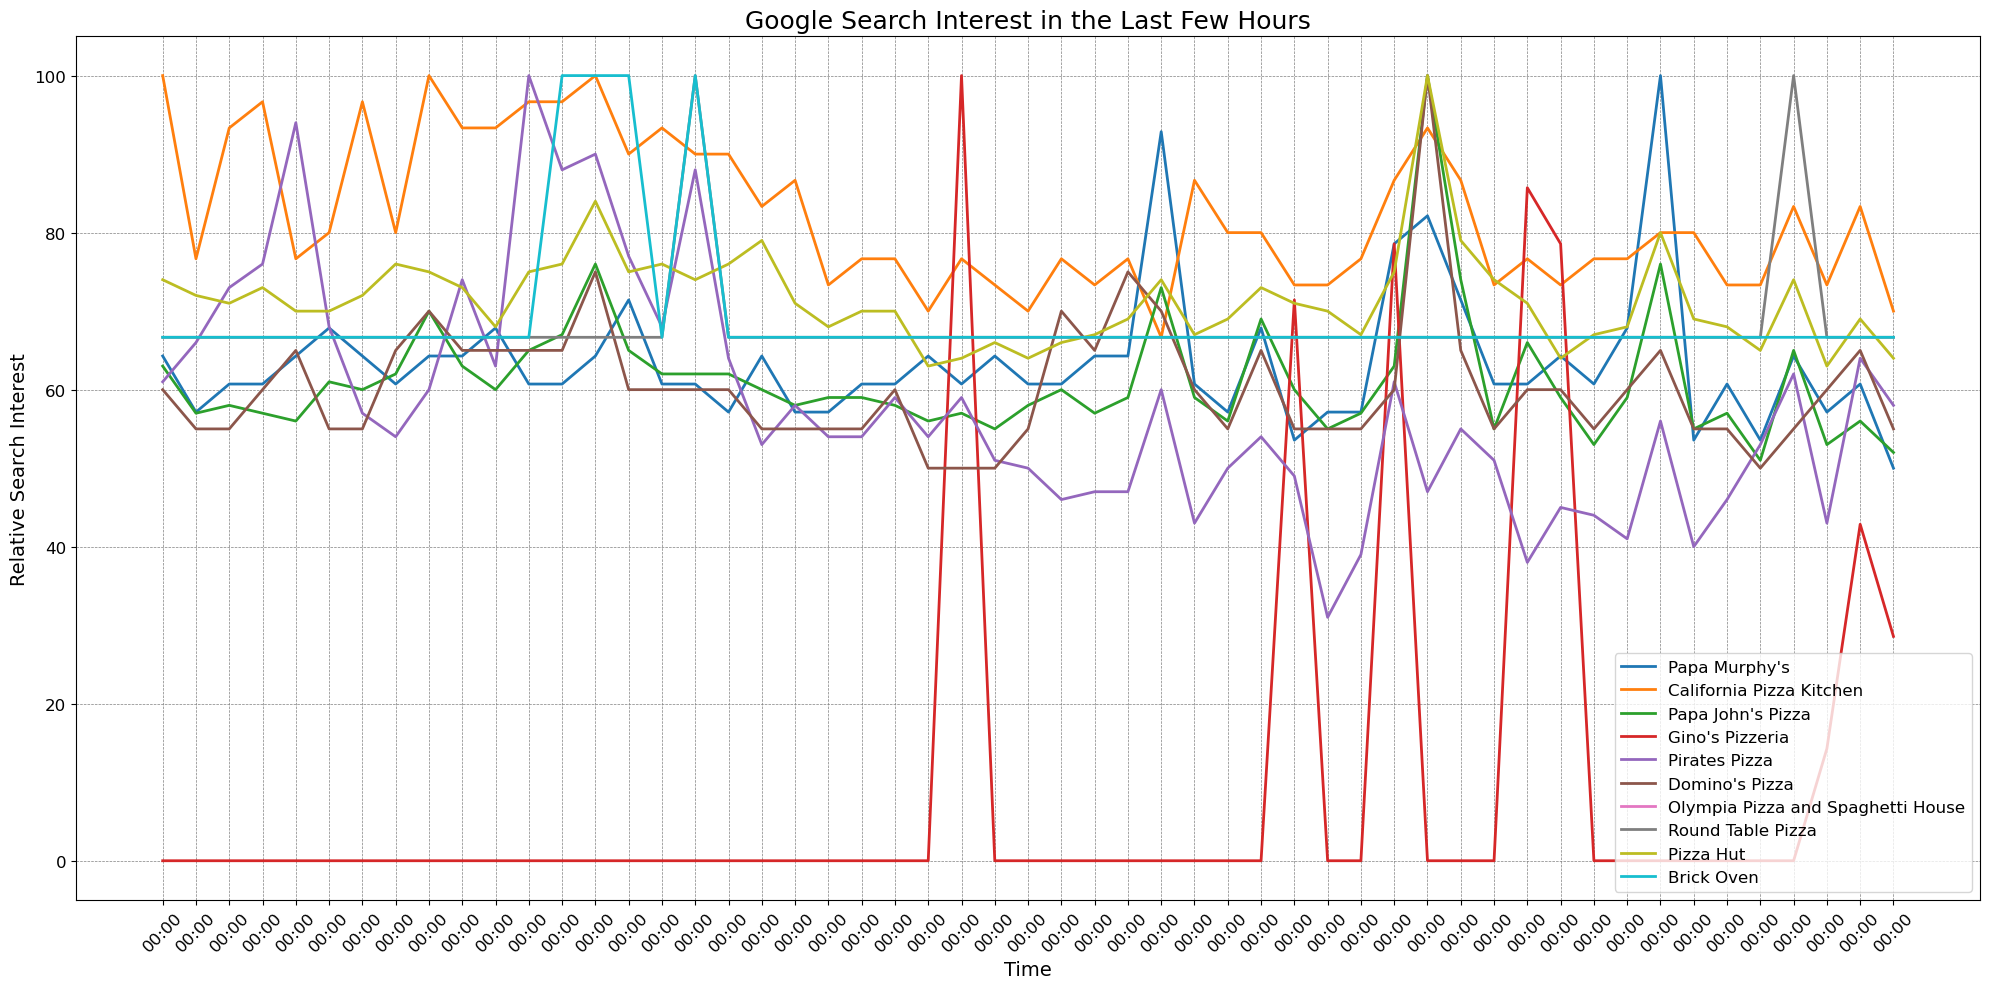

In [17]:
import matplotlib.pyplot as plt

# Assuming 'combined_df' contains your hourly Google Trends data for the last few hours

plt.figure(figsize=(20, 10))  # Increased figure size for readability

# Plot each column (each restaurant)
for column in combined_df.columns:
    plt.plot(combined_df.index, combined_df[column], label=column, linewidth=2)

# Make the chart readable
plt.title('Google Search Interest in the Last Few Hours', fontsize=18)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Relative Search Interest', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth='0.5', color='grey')

# If your DataFrame index is DateTime, set the format
if isinstance(combined_df.index, pd.DatetimeIndex):
    plt.xticks(ticks=combined_df.index, labels=combined_df.index.strftime('%H:%M'), rotation=45)

plt.tight_layout()  # Adjust the padding between and around subplots.

# Show the plot
plt.show()


In [ ]:
4ZZMZmr6GScr87VuVOEy4SZgso_pV1pgKcwKhOr59qZmnCMM2G7H-UWKckIr3pa0B7Df_qrqmrn4fb7xKNOYRw3WAlUhWxHe_Tnf_7kKAAdxsz9VDbuZUkqXrdnnZXYxb

In [21]:
import requests

# Replace 'YOUR_API_KEY' with your actual Yelp API key
api_key = 'Y_BBIzgLcwWggozOg0bSPfaeSZO4tDT1p3O9ls3hVDhlUFAXh7O0lN2hEmN6gAbUdj37HzdWliQ4Mmbmy2UVC_4Ep5sgcRqytcQl5tJMYafpJa4EMTqDT-LvylUPZnYx'
headers = {'Authorization': f'Bearer {api_key}'}

# The Yelp business ID of the pizza restaurant
business_id = 'pS_vP9dCrpiGXRsvf-DCeg'

# Constructing the request URL and making the API call
url = f'https://api.yelp.com/v3/businesses/{business_id}/reviews'
response = requests.get(url, headers=headers)

if response.status_code == 200:
    reviews = response.json()
    
    # Processing the review data
    for review in reviews['reviews']:
        print(review['text'])  # Prints the text of each review
else:
    print("Failed to retrieve reviews")


Every time I order from this Pizza Hut something always goes wrong this time there was no chicken in the pasta and to get someone on the phone is murder cuz...
I'd seen the signs for a whole, but never got a flyer or any notice of the store opening. Despite living 10 minutes away in the same neighborhood, i thought...
Spoke to a rep on the phone some Indian guy and he was trying to avoid any orders over the phone just be done with his. He said "I need to see how far your...


In [48]:
import requests

# Your Yelp API Key
api_key = 'Y_BBIzgLcwWggozOg0bSPfaeSZO4tDT1p3O9ls3hVDhlUFAXh7O0lN2hEmN6gAbUdj37HzdWliQ4Mmbmy2UVC_4Ep5sgcRqytcQl5tJMYafpJa4EMTqDT-LvylUPZnYx'
headers = {'Authorization': f'Bearer {api_key}'}

# Parameters for the API call: Adjust 'term' and 'location' as needed
params = {
    'term': "Olympia",  # Name of the restaurant or business
    'location': 'New York, NY',  # Location
    'limit': 1  # Number of results to return
}

url = 'https://api.yelp.com/v3/businesses/search'

response = requests.get(url, headers=headers, params=params)

if response.status_code == 200:
    businesses = response.json()
    for business in businesses['businesses']:
        print(f"Name: {business['name']}, Yelp ID: {business['id']}")
else:
    print("Failed to retrieve business ID")


Name: Olympia Wine Bar, Yelp ID: zOFSM3ULgQq-Ag1jNaEQKA


In [44]:
import requests
import pandas as pd

# Your Yelp API key and headers for authorization
api_key = 'Y_BBIzgLcwWggozOg0bSPfaeSZO4tDT1p3O9ls3hVDhlUFAXh7O0lN2hEmN6gAbUdj37HzdWliQ4Mmbmy2UVC_4Ep5sgcRqytcQl5tJMYafpJa4EMTqDT-LvylUPZnYx'
headers = {'Authorization': f'Bearer {api_key}'}

# Yelp business ID for the pizza restaurant
business_id = 'tJFxGZ5OcRPs90QEq8mWgw'

# URLs for API calls
reviews_url = f'https://api.yelp.com/v3/businesses/{business_id}/reviews'
business_url = f'https://api.yelp.com/v3/businesses/{business_id}'

# Fetching the business name
business_response = requests.get(business_url, headers=headers)
if business_response.status_code == 200:
    business_data = business_response.json()
    restaurant_name = business_data['name']  # Extracting the restaurant's name
else:
    print("Failed to retrieve business details")
    restaurant_name = "Unknown Restaurant"  # Fallback name

# Fetching the reviews
response = requests.get(reviews_url, headers=headers)
if response.status_code == 200:
    reviews_data = response.json()['reviews']
    
    # Create a list of dictionaries to convert to DataFrame
    reviews_list = [{
        'Restaurant Name': restaurant_name,
        'Review': review['text'],
        'Rating': review['rating'],
        'Time Created': review['time_created'],
        'User Name': review['user']['name']
    } for review in reviews_data]
    
    # Converting the list to a DataFrame
    reviews_df = pd.DataFrame(reviews_list)
    
    # Displaying the DataFrame
    print(reviews_df)
else:
    print("Failed to retrieve reviews")


    Restaurant Name  \
0  Papa Johns Pizza   
1  Papa Johns Pizza   
2  Papa Johns Pizza   

                                                                                                                                                             Review  \
0  Carry out\n\nI recently had the opportunity to try Papa John's Pizza and I must say, I enjoyed it. The pepperoni pizza had the perfect balance of flavors and...   
1      This place is garbage. I ordered takeout via Uber eats. I called before to say I want stuffed crust. They said cool. Pizza arrived, wasn't stuffed crust,...   
2   I arrived during lunch time to get 2 slices of pepperoni that was $2.00 dollars a piece I wanted to pay with debit or credit  the cashier said cash only . I...   

   Rating         Time Created  User Name  
0       4  2023-03-20 20:38:02     Ada Y.  
1       1  2024-03-17 15:30:07   Geoff H.  
2       1  2023-09-12 16:11:48  Arturo S.  


In [45]:
reviews_df.to_csv("Papa Johns Pizza.csv")

In [26]:
import pandas as pd

# Adjust display settings
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None)  # Show full content of each cell
pd.set_option('display.width', None)  # Auto-adjust the display width

# Assuming reviews_df is your DataFrame
print(reviews_df)


  Restaurant Name  \
0       Pizza Hut   
1       Pizza Hut   
2       Pizza Hut   

                                                                                                                                                            Review  \
0  Every time I order from this Pizza Hut something always goes wrong this time there was no chicken in the pasta and to get someone on the phone is murder cuz...   
1  I'd seen the signs for a whole, but never got a flyer or any notice of the store opening. Despite living 10 minutes away in the same neighborhood, i thought...   
2   Spoke to a rep on the phone some Indian guy and he was trying to avoid any orders over the phone just be done with his. He said "I need to see how far your...   

   Rating         Time Created    User Name  
0       1  2023-12-03 14:49:27  Rosa-lyn M.  
1       3  2022-05-16 14:19:15    Farrah B.  
2       1  2023-11-25 22:56:59      Juan C.  
